In [1]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
plant=['rice','maize','chickpea','kidneybeans','pigeonpeas','mothbeans','mungbean','blackgram','lentil','pomegranate','banana','mango','grapes','watermelon','muskmelon','apple','orange','papaya','coconut','cotton','jute','coffee']
filename = 'Crop_recommendation.csv'
crop = pd.read_csv(filename)
crop.shape
crop.columns = crop.columns.str.replace(' ', '')

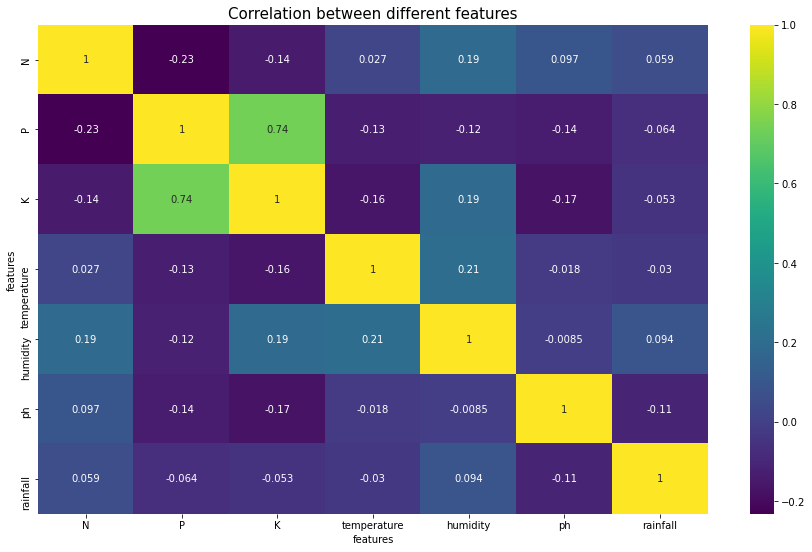

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()


In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
crop_elem= crop[['N','P','K']]
crop_cond= crop[['temperature','humidity','ph','rainfall']]
crop_label= crop[['label']]

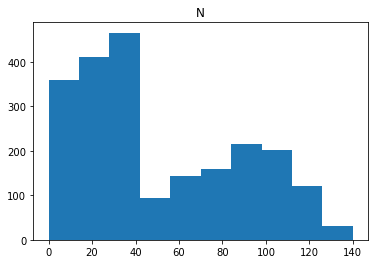

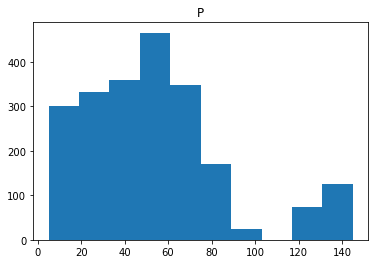

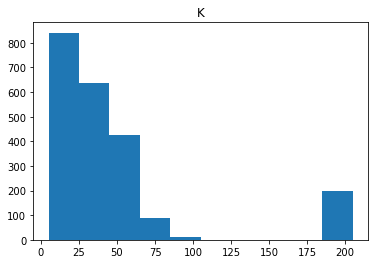

In [7]:
for i in crop_elem.columns:
    plt.hist(crop_elem[i])
    plt.title(i)
    plt.show()

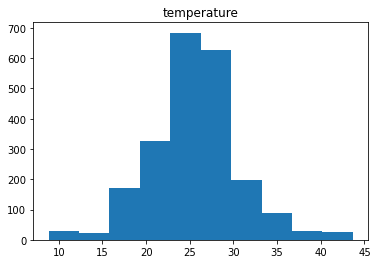

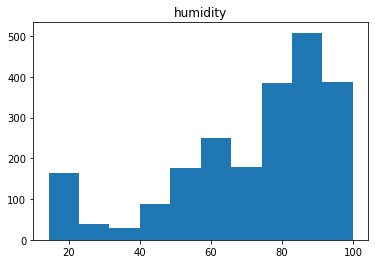

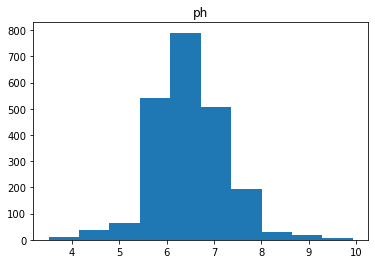

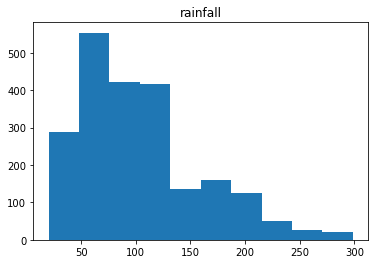

In [8]:
for i in crop_cond.columns:
    plt.hist(crop_cond[i])
    plt.title(i)
    plt.show()

In [9]:
pd.pivot_table(crop,index='label',values=['temperature','rainfall','N','P','K','humidity','ph'])

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [10]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

acc = []
model = []

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

In [11]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [12]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [13]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


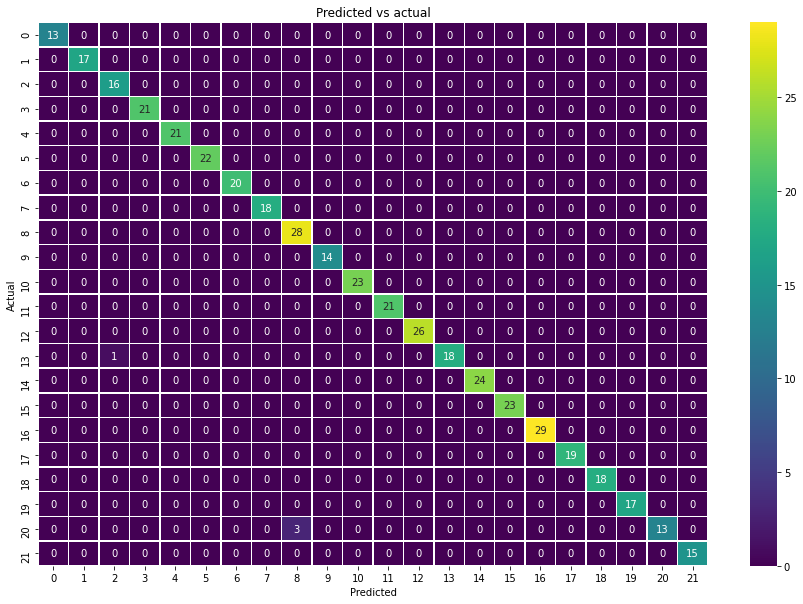

In [14]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [15]:
print("Enter your own data to test the model:")
N = int(input("Enter Nitrogen:"))
P = int(input("Enter Phosphorus:"))
K = int(input("Enter Potassium:"))
temp = float(input("Enter Temperature:"))
humidity = float(input("Enter Humidity:"))
ph = float(input("Enter pH:"))
rainfall = float(input("Enter Rainfall:"))
userInput = [N, P, K, temp, humidity, ph, rainfall]

result = RF.predict([userInput])[0]

Enter your own data to test the model:
Enter Nitrogen:25
Enter Phosphorus:140
Enter Potassium:220
Enter Temperature:25
Enter Humidity:95
Enter pH:4
Enter Rainfall:120


In [16]:
print("The input provided is classified as:",result)

The input provided is classified as: apple
